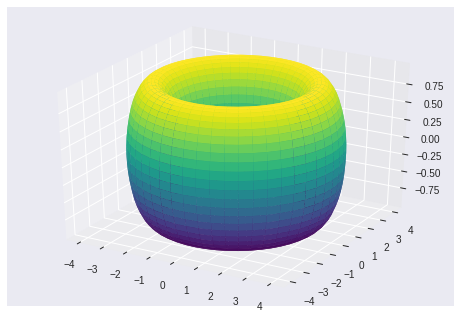

In [0]:
# based on 
# https://junjiecai.github.io/en/posts/2017/Jan/31/sympy_intro_4/

from sympy import *
from sympy.plotting import plot3d_parametric_surface

x, y = symbols('x y')
f1 = 3*cos(x) + cos(x)*cos(y)
f2 = 3*sin(x) + sin(x)*cos(y)
f3 = sin(y)

x_range = (x, 0, 2*pi)
y_range = (y, 0, 2*pi)

plot3d_parametric_surface(f1, f2, f3, x_range, y_range);

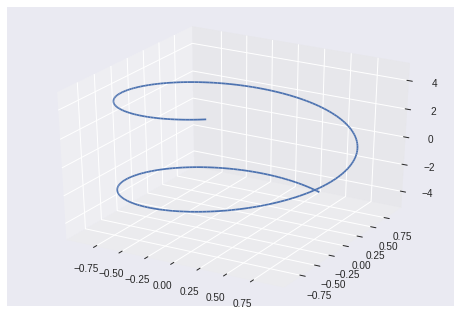

In [0]:
from sympy import symbols, cos, sin
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
expr_x = cos(u)
expr_y = sin(u)
expr_z = u

plot3d_parametric_line(expr_x, expr_y, expr_z, (u, -5, 5));

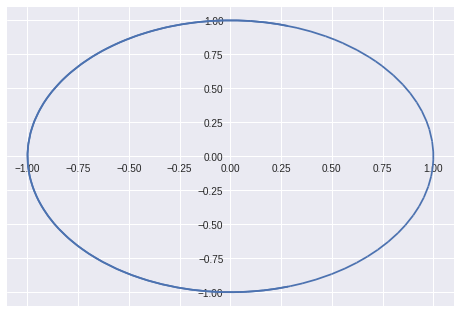

In [0]:
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric

u = symbols('u')
expr_x = cos(u)
expr_y = sin(u)

p = plot_parametric(expr_x, expr_y, (u, -5, 5));

In [0]:
# My functions to calclate specific points on parametric functions
import sympy

def exprMultVarEv(g, varReplace):
  """
  f1 = 3*cos(t) + cos(t)*cos(s)
  f2 = 3*sin(t) + sin(t)*cos(s)
  f3 = sin(s)
  g = (f1, f2, f3)
  """
  g_out = []
  for f in g:
    g_out.append(f.subs(varReplace).evalf())
  return g_out

def genSubs(staticVars, *v_args):
  subs = []  
  v, v_min, v_max, v_n = None, None, None, None
  try:
      v, v_min, v_max, v_n = v_args
  except (TypeError, IndexError):
      raise ValueError("v_args and y_args must be tuples of the form (var, min, max, intervals)")
  v_l = float(v_max - v_min)
  v_d = v_l/float(v_n)
  v_a = np.arange(float(v_min), float(v_max) + v_d, v_d)
  eVars = []
  for e in v_a:
    eVars.clear()
    eVars = staticVars.copy()
    eVars.append((v, e))
    subs.append(eVars[:])   
  return subs

def nVarInMVarOutEv(accg_out, g, staticVars, *v_args):
  """
  s = symbols('s')
  g_res = nVarInMVarOutEv(accg, g, [(t,0)], s, 0, 10, 20)
  """
  g_outs = []
  subs = genSubs(staticVars, *v_args)
  for sb in subs:
    Ev = exprMultVarEv(g, sb)
    g_outs.append(Ev)
    accg_out.append(Ev)
  return accg_out, g_outs

def getXYZ(xyzSet):
  """
  X, Y, Z = getXYZ(g_res)
  """
  X = Y = Z = []
  for xyz in xyzSet:
    X.append(xyz[0])
    Y.append(xyz[1])
    Z.append(xyz[2])
  return np.array(X), np.array(Y), np.array(Z)

In [0]:
t, s = symbols('t s')
f1 = 3*cos(t) + cos(t)*cos(s)
f2 = 3*sin(t) + sin(t)*cos(s)
f3 = sin(s)
g = (f1, f2, f3)
# f.subs([(t,0),(s,pi)])
g_out = []
subs = [(t,0),(s,pi)]
# for f in g:
#   g_out.append(f.subs(subs).evalf())
# # print(g_out)


def exprMultVarEv(g, varReplace):
  g_out = []
  for f in g:
    g_out.append(f.subs(varReplace).evalf())
  return g_out

exprMultVarEv(g, subs)

[2.00000000000000, 0, 0]

In [0]:
import sympy
import numpy as np

def genSubs(staticVars, *v_args):
  subs = []  
  v, v_min, v_max, v_n = None, None, None, None
  try:
      v, v_min, v_max, v_n = v_args
  except (TypeError, IndexError):
      raise ValueError("v_args and y_args must be tuples of the form (var, min, max, intervals)")
  v_l = float(v_max - v_min)
  v_d = v_l/float(v_n)
  v_a = np.arange(float(v_min), float(v_max) + v_d, v_d)
  eVars = []
  for e in v_a:
    eVars.clear()
    eVars = staticVars.copy()
    eVars.append((v, e))
    subs.append(eVars[:])   
  return subs

s = symbols('s')
s = genSubs([(t,0)], s, 0, 10, 20)
for z in s:
  print(z)


[(t, 0), (s, 0.0)]
[(t, 0), (s, 0.5)]
[(t, 0), (s, 1.0)]
[(t, 0), (s, 1.5)]
[(t, 0), (s, 2.0)]
[(t, 0), (s, 2.5)]
[(t, 0), (s, 3.0)]
[(t, 0), (s, 3.5)]
[(t, 0), (s, 4.0)]
[(t, 0), (s, 4.5)]
[(t, 0), (s, 5.0)]
[(t, 0), (s, 5.5)]
[(t, 0), (s, 6.0)]
[(t, 0), (s, 6.5)]
[(t, 0), (s, 7.0)]
[(t, 0), (s, 7.5)]
[(t, 0), (s, 8.0)]
[(t, 0), (s, 8.5)]
[(t, 0), (s, 9.0)]
[(t, 0), (s, 9.5)]
[(t, 0), (s, 10.0)]


In [0]:
def nVarInMVarOutEv(g, staticVars, *v_args):
  g_outs = []
  subs = genSubs(staticVars, *v_args)
  for sb in subs:
    g_outs.append(exprMultVarEv(g, sb))
  return g_outs

s = symbols('s')
g_res = nVarInMVarOutEv(g, [(t,0)], s, 0, 10, 20)
for z in g_res:
  print(z)

[4.00000000000000, 0, 0]
[3.87758256189037, 0, 0.479425538604203]
[3.54030230586814, 0, 0.841470984807897]
[3.07073720166770, 0, 0.997494986604054]
[2.58385316345286, 0, 0.909297426825682]
[2.19885638445307, 0, 0.598472144103956]
[2.01000750339955, 0, 0.141120008059867]
[2.06354331270920, 0, -0.350783227689620]
[2.34635637913639, 0, -0.756802495307928]
[2.78920420056922, 0, -0.977530117665097]
[3.28366218546323, 0, -0.958924274663138]
[3.70866977429126, 0, -0.705540325570392]
[3.96017028665037, 0, -0.279415498198926]
[3.97658762572802, 0, 0.215119988087816]
[3.75390225434330, 0, 0.656986598718789]
[3.34663531783503, 0, 0.937999976774739]
[2.85449996619139, 0, 0.989358246623382]
[2.39798809731518, 0, 0.798487112623490]
[2.08886973811532, 0, 0.412118485241757]
[2.00282784380362, 0, -0.0751511204618093]
[2.16092847092355, 0, -0.544021110889370]
